# 제 4고지. 신경망 만들기

- 지금까지는 변수로 스칼라만 취급했습니다. 그러나 머신러닝에서는 텐서(다차원배열)가 주역입니다. 
- 이번 제4고지의 목표는 DeZero를 머신러닝용으로, 특히 신경망을 잘 다루도록 확장하는 것입니다. 
- 그 첫걸음은 텐서를 사용해 계산하기 입니다. 
- 머신러닝에서 미분을 계산하는 작업은 복잡해지기 쉽습니다. 
- 그러나 DeZero는 이미 자동 미분의 기초를 제공하기 때문에 앞으로 할 작업도 기술적으로는 그다지 어렵지 않습니다. 
- 그 다음은 DeZero의 자동 미분 위에 머신러닝에 필요한 함수와 기능을 추가하는 것이 주된 작업입니다. 
- 이 작업이 끝나면 머신러닝 문제를 몇 가지 풀어보면서 DeZero의 실력을 확인해 보겠습니다. 
- 이번 고지는 지금까지 시간을 들여 만들어온 DeZero가 딥러닝(신경망)분야에서 꽃피는 무대입니다. 
- 고지를 정복할 무렵에는 DeZero가 '딥러닝 프레임워크'라고 불러도 좋을 만큼 성장해 있을 것입니다. 

# 37. 텐서를 다루다

- 지금까지는 변수로 주로 '스칼라'를 다뤘는데, 머시러닝 데이터로는 벡터나 행렬 등의 '텐서'가 주로 쓰입니다. 
- 이번 단계에서는 텐서를 사용할 때의 주의점을 알아보면서 DeZero 확장을 준비합니다. 

## 37.1 원소별 계산

- 지금까지 add, mul, div, sin 등 DeZero 함수를 구현하면서 아래 예시와 같이 입력과 출력이 모두 '스칼라'라고 가정했습니다. 

In [5]:
import numpy as np
import dezero.functions as F
from dezero import Variable

x = Variable(np.array(1.0))  # x가 단일값인 스칼라(정확하게는 0차원의 ndarray 인스턴스)
y = F.sin(x)
print(y)

variable(0.8414709848078965)


- x가 텐서일 경우, 가령 행렬이라면 어떻게 될까요?

In [7]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sin(x)             
print(y)      

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])


- 이와 같이 sin 함수가 x의 원소 각각에 적용되므로, 입력과 출력 텐서의 형상은 (2,3)으로 바뀌지 않습니다. 
- 이처럼 지금까지 구현한 DeZero 함수들은 원소별 계산이 이루어집니다. 
- 다른 예로, 덧셈에서도 원소별 계산이 이루어집니다. 

In [8]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
y = x + c
print(y)   

variable([[11 22 33]
          [44 55 66]])


- 만약 x와 c의 형상이 다르면 자동으로 데이터를 복사해서 같은 형상의 텐서로 변환해 주는 기능으로 브로드캐스트(broadcase) 기능이 있습니다.

## 37.2 텐서 사용 시의 역전파

- 텐서를 사용한 계산에 역전파를 적용하려면 무엇을 바꿔야 할까요?
- 지금까지 구현한 함수들은 '텐서'를 이용해 계산해도 역전파 코드가 문제없이 작동했습니다. 그 이유는...
    - 그동안 '스칼라'를 대상으로 역전파를 구현했습니다. 
    - 지금까지 구현한 DeZero 함수에 '텐서'를 건네면 텐서의 원소마다 '스칼라'로 계산합니다. 
    - 텐서의 원소별 '스칼라' 계산이 이루어지면 '스칼라'를 가정해 구현한 역전파는 '텐서'의 원소별 계산에서도 성립합니다. 
- 이상의 논리로부터 원소별 계산을 수행하는 DeZero 함수들은 '텐서'를 사용한 계산에도 역전파를 올바르게 해낼 것임을 유추할 수 있습니다.     

In [9]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = F.sum(t)

- 위의 코드에서 x, c, t는 모두 (2, 3) 형상이지만 마지막 출력 y는 스칼라입니다. 
    - 머신러닝 문제에서는 텐서를 입력받아 스칼라를 출력하는 함수(손실함수, Loss Function)를 설정하는 것이 일반적입니다. 
- 아래 그림은 위 코드의 계산 그래프입니다. 

![title](image/그림37-1.png)

- 실제로 역전파를 해보겠습니다. 

In [10]:
y.backward(retain_grad=True)  # 미분값이 유지됩니다. 
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

variable(1)
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


- 이처럼 지금까지 구현한 DeZero 함수들은 텐서를 사용한 계산에서도 제대로 역전파할 수 있습니다. 
- 여기에서 중요한 특징이 하나 등장합니다. 
    - 기울기의 형상과 데이터(순전파 때의 데이터)의 형상이 일치한다는 것입니다. 
    - 즉, x.shape == x.grad.shape 이며, c.shape == c.grad.shape 이고, t.shape == t.grad.shape 입니다. 
    - 이 성질을 이용하면 원소별 계산이 아닌 함수, 가령 sum이나 reshape 함수 등을 구현하기도 어렵지 않습니다. 
- 텐서의 미분을 머신러닝에서는 '기울기'라고 합니다. 
- 이번 단계의 주요 내용은 여기까지 입니다. 다음 절에서는 수식을 이용하여 텐서를 사용했을 때의 역전파에 대해 보충합니다. 

## 37.3 [보충] 텐서 사용 시의 역전파

- 이번 절에서는 텐서를 사용했을 때의 역전파를 수식으로 설명합니다. 
- y = F(x)라는 함수를 생각해봅시다. x와 y는 벡터, 두 벡터 모두 원소의 수가 n개라고 가정합니다. 
    - 여기에서는 '벡터'에 한정해서 진행합니다. 향후 n차원 텐서에도 벡터화 처리(원소를 1열로 정렬하는 형상 변환 처리)를 통해서 해결할 수 있습니다. 
- y와 x모두 벡터이면, y = F(x)의 미분은 '행렬'의 형태가 됩니다. 이 행렬을 야코비 행렬(Jacobian matrix)라고 합니다. 
- y가 스칼라이면 y의 x에 대한 미분은 1xn의 야코비 행렬이며, 행 벡터(가로로 나열된 벡터)가 됩니다.  

- 합성 함수 y = F(x)가 a = A(x), b = B(x), y = C(b)라는 3개의 함수로 구성되어 있고, x, a, b는 벡터이고 원소 수는 모두 n개입니다. 
- 최종 출력 y만 스칼라인 경우, y의 x에 대한 미분은 연쇄 법칙에 의해 아래 식으로 표시됩니다. 

![title](image/식37.1.png)

- 여기에서 $dy/db$와 $db/da$는 야코비 행렬입니다. 이 값들을 행렬의 곱으로 계산합니다. 이것이 위 식이 의미하는 내용입니다. 

- 이어서 위 행렬 곱을 구하는 순서를 알아보겠습니다. 첫번째 방법은아래와 같이 입력 쪽에서 출력 쪽으로 계산해 가는 방식입니다. 
- 아래와 같이 입력 쪽에서 출력 쪽으로 괄호를 치는 계산 방식을 '자동 미분의 forward 모드'라고 합니다. 
- 여기에서 주목할 점은 중간의 행렬의 곱의 결과가 다시 행렬이 된다는 것입니다. 예를 들어 $db/da*da/dx$의 **결과는 nxn 행렬** 입니다. 

![title](image/그림37-2.png)

- 두번째 방법은 아래와 같이 출력 쪽에서 입력 쪽으로 계산해 가는 방식입니다. 첫 번째 방법과 반대이므로 reverse 모드라고 합니다. (정확하게는 '자동 미분의 reverse 모드'입니다. 

![title](image/그림37-3.png)

- 위 그림은 출력 쪽에서 입력 쪽으로 괄호를 쳐서 계산합니다. 이 때 y가 스칼라이므로 중간의 행렬 곱의 결과는 모두 벡터(행벡터)입니다. 
- 예를 들어 $dy/db*db/da$의 **결과는 n개의 원소로 구성된 벡터** 입니다. 
    - forward 모드는 nxn 행렬을 전파합니다. 그에 비해 reverse 모드에서는 n개의 벡터를 전파합니다. 
    - 그런데 행렬과 행렬의 곱보다 벡터와 행렬의 곱 쪽의 계산량이 적습니다. 
    - 이런 이유로 reverse 모드, 즉 역전파 쪽의 계산 효율이 좋습니다. 
- 위 그림과 같이 역전파 reverse 모드는 각 함수에 대해 벡터와 야코비 행렬의 곱을 계산합니다. 
- 여기에서 중요한 점은, 원소별 연산의 야코비 행렬은 대각 행렬(대각 성분 외에는 모두 0인 행렬)이므로, 
- $x_i$는 $a_i$에만 영향을 주기 때문에, 명시적으로 야코비 행렬을 구하여 행렬의 곱을 계산할 필요가 없다는 것입니다. 
- 단순히 결과만 필요한 상황이라면 더 효율적으로 계산(구현)할 수 있는 방법을 사용하면 되므로, 역전파 수행에 아무런 문제가 없습니다. 
- 최종 결과는 원소별 미분을 계산한 다음 그 결괏값을 원소별로 곱하면 얻을 수 있습니다. 
- 즉, 원소별 연산에서는 역전파도 미분을 원소별로 곱하여 구한다는 뜻입니다. 

# 38. 형상 변환 함수

- 이전 단계에서는 텐서를 사용한 계산에서의 역전파를 설명했습니다. 요약하면 다음과 같습니다. 
    - 원소별 연산을 수행하는 함수(add, sin 등)는 입출력 데이터가 스칼라라고 가정하고 순전파와 역전파를 구현할 수 있습니다. 
    - 이 경우 텐서를 입력해도 역전파가 올바르게 성립합니다. 
- 앞으로는 원소별로 계산하지 않는 함수에 대해 살펴보겠습니다. 
- 이번 단계에서는 그 첫걸음으로 '텐서의 형상을 바꾸는'두 가지 함수를 구현합니다. 
    - 텐서의 형상을 변환하는 reshape 함수와 
    - 행렬을 전치하는 transpose 함수입니다. 

## 38.1 reshape 함수 구현

- 텐서의 형상을 바꾸는 함수를 구현해 보겠습니다. 

In [1]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.reshape(x, (6,))
print(y)

[1 2 3 4 5 6]


- x의 형상을 (2,3)에서 (6,)으로 변환했습니다. 텐서의 원소 수는 같고 형상만 바뀝니다. 
- 이제 DeZero 버전의 reshape 함수를 구현할 차례입니다. 이 때 문제는 역전파를 어떻게 구현하느냐입니다. 
    - 계산을 원소별로 하지 않는 함수는 텐서의 형상을 고려해야 합니다. 
    - 그러면 역전파 구현이 명확해 집니다. 
    - 구체적으로는 변수의 데이터와 기울기의 형상이 일치하는지 확인해야 합니다. 
    - 예를 들어, x가 Variable 인스턴스일 때, ```x.data.shape = x.grad.shape```를 만족할 수 있도록 역전파를 구현합니다. 
- reshape 함수는 단순히 형상만 변환합니다. 아래와 같이 기울기의 형상이 입력의 형상과 같아지도록 변환합니다.     

![title](image/그림38-1.png)

- 위 그림에서 역전파는 출력 쪽(6,)에서부터 입력 변수 쪽(2,3)의 형상에 맞게 변환하여 기울기를 전달합니다. 

In [ ]:
class Reshape(Function):
    def __init__(self, shape):  # 초기화 할 때 변형 목표가 되는 형상을 shape 인수로 받습니다. 
        self.shape = shape

    def forward(self, x): 
        self.x_shape = x.shape     # 입력 x의 형상을 기억해둠
        y = x.reshape(self.shape)  # 형상 변환
        return y

    def backward(self, gy):        # Variable 인스턴스
        return reshape(gy, self.x_shape)  # 입력 형상으로 변환

In [3]:
from dezero.core import as_variable

def reshape(x, shape):         # 인수 x는 ndarray 인스턴스 또는 Variable 인스턴스 중 하나라고 가정
    if x.shape == shape:       # 형상이 같은지 확인
        return as_variable(x)  # Variable 인스턴스로 변환 (DeZero 함수는 항상 ndarray 인스턴스 또는 Variable 인스턴스를 입력
    return Reshape(shape)(x)   # 받아서 Variable 인스턴스를 반환하는 것이 규칙임) Function 클래스를 상속한 함수라면(가령 Reshape)
                               # 해당 함수 클래스의 __call__ 메서드에서 ndarray 인스턴스는 자동으로 Variable 인스턴스로 변환됨

In [4]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[0, 1, 2], [3, 4, 5]]))
y = F.reshape(x, (6,))  # y = x.reshape(6)
y.backward(retain_grad=True)  
print(x.grad)


x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.transpose(x)  # y = x.T
y.backward()
print(x.grad)

variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


- 이와 같이 reshape 함수로 형상을 변환했습니다. 
- ```y.backward(retain_grad=True)```를 수행하여 x의 기울기를 구합니다. 이 과정에서 y의 기울기도 자동으로 채워집니다. 
- 채워진 기울기의 형상은 y와 같고(```y.grad.shape == y.shape```), 원소는 모두 1로 이루어진 텐서입니다. 
- 그럼 실제로 어떤 데이터가 흐르게 되는지 살펴볼까요? 결과는 아래 그림과 같습니다. 

![title](image/그림38-2.png)

- 위 그림과 같이 순전파에서는 텐서의 형상이 (2,3)에서 (6,)으로 변합니다. 
- 그리고 역전파에서는 기울기의 형상이 (6,)에서 (2,3)으로 순전파 때와는 반대로 변합니다. 
- 이 때 각 변수의 data와 grad 형상이 일치함을 확인할 수 있습니다. 
- 이상이 DeZero의 reshape 함수 구현입니다. 
- 이어서 이 함수를 더 편리하게 사용할 수 있는지 고민해보겠습니다. 

## 38.2 Variable에서 reshape 사용하기

- 다음 목표는 DeZero의 reshape 함수를 넘파이의 reshape와 비슷하게 만들기 입니다. 

In [6]:
x = np.random.rand(1, 2, 3)

y = x.reshape((2, 3))  # 튜플로 받기
y = x.reshape([2, 3])  # 리스트로 받기
y = x.reshape(2, 3)    # 인수를 그대로(풀어서) 받기

In [8]:
import dezero

class Variable:
    ...
    def reshape(self, *shape):  # 가변 인수를 받는 reshape 메서드를 추가합니다. 
        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
            shape = shape[0]
        return dezero.functions.reshape(self, shape)  # F.reshape가 아닌 dezero.functions.reshape로 순환 임포트를 피함

In [16]:
from dezero.core import Variable
x = Variable(np.random.randn(1, 2, 3))  # reshape 함수를 Variable 인스턴스의 메서드 형태로도 호출할 수 있게 되어 편의성이 좋아짐
y = x.reshape((2, 3))
y = x.reshape(2, 3)

## 38.3 행렬의 전치

- 행렬을 전치해주는 함수를 구현하겠습니다. 당장은 입력 변수가 행렬 (2차원 텐서)일 때로 한정하여 구현하겠습니다. 

- 넘파이에서도 transpose 함수를 사용하여 전치를 할 수 있습니다. 

![title](image/그림38-3.png)

In [11]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.transpose(x)
print(y)

[[1 4]
 [2 5]
 [3 6]]


In [13]:
from dezero.core import Function

class Transpose(Function):
    def forward(self, x):
        y = np.transpose(self.axes)  # 순전파는 np.transpose 함수를 사용하여 전치합니다. 
        return y

    def backward(self, gy):
        if self.axes is None:
            return transpose(gy)     # 역전파에서는 아래 구현한 transpose 함수를 사용하여 변환합니다. 
                                     # 순전파와는 '반대'의 변환이 이루어집니다.  
def transpose(x, axes=None):  
    return Transpose(axes)(x)

In [15]:
from dezero.core import Variable

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.transpose(x)  # y = x.T
y.backward()
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [17]:
class Variable:           # Variable 인스턴스에서도 transpose 함수를 사용할 수 있도록 아래 내용 추가
    ...
    
    def transpose(self):  # '인스턴스 메서드'로 이용하기 위한 코드
        return dezero.functions.transpose(self)
    
    @property             # '인스턴스 변수'로 사용할 수 있게 해주는 데코레이터
    def T(self):
        return dezero.functions.transpose(self)

In [19]:
from dezero.core import Variable

x = Variable(np.random.rand(2, 3))
y = x.transpose()
y = x.T

## 38.4 [보충] 실제 transpose 함수

- 넘파이의 np.transpose 함수는 더 범용적으로 사용할 수 있습니다. 
- 예를 들어 다음과 같이 축의 데이터 순서를 바꿀 수 있습니다.

In [24]:
A, B, C, D = 1, 2, 3, 4
print(A, B, C, D)
x = np.random.rand(A, B, C, D)
print('x= \n', x)
y = x.transpose(1, 0, 3, 2)
print('y= \n', y)

1 2 3 4
x= 
 [[[[0.2678718  0.21866634 0.69517986 0.32890727]
   [0.54988738 0.96322451 0.56156521 0.82434343]
   [0.76820065 0.21515887 0.74342488 0.72019163]]

  [[0.70502528 0.16509467 0.49733075 0.98305973]
   [0.20977125 0.83768775 0.05047292 0.65939255]
   [0.68441225 0.13759956 0.83533146 0.19390419]]]]
y= 
 [[[[0.2678718  0.54988738 0.76820065]
   [0.21866634 0.96322451 0.21515887]
   [0.69517986 0.56156521 0.74342488]
   [0.32890727 0.82434343 0.72019163]]]


 [[[0.70502528 0.20977125 0.68441225]
   [0.16509467 0.83768775 0.13759956]
   [0.49733075 0.05047292 0.83533146]
   [0.98305973 0.65939255 0.19390419]]]]


![title](image/그림38-4.png)

- 위와 같이 축의 순서를 지정하면 그에 맞게 데이터 축이 달라집니다. 
- 인수를 None으로 주면 축이 역순으로 정렬됩니다. (기본값은 None입니다)
- 따라서 x가 행렬일 때 x.tranpose()를 실행하면 0번째와 1번째 축의 데이터가 1번째와 0번째 순서로 바뀝니다. 
- 즉, 행렬이 '전치' 됩니다. 
- DeZero의 실제 transpose 함수도 이처럼 축 데이터를 교환할 수 있게 구현해뒀습니다. 
- 역전파 때는 당연히 축의 방향도 '반대로' 전환됩니다. 

In [25]:
class Transpose(Function):
    def __init__(self, axes=None):
        self.axes = axes

    def forward(self, x):
        y = x.transpose(self.axes)
        return y

    def backward(self, gy):
        if self.axes is None:  # 인수를 None으로 주면 축이 역순으로 정렬
            return transpose(gy)

        axes_len = len(self.axes)
        inv_axes = tuple(np.argsort([ax % axes_len for ax in self.axes]))
        return transpose(gy, inv_axes)

# 39. 합계 함수

- 이번 단계에서는 DeZero에 합계를 구하는 함수 sum을 추가합니다. 
- 먼저 덧셈의 미분을 복습하고 sum 함수의 미분을 이끌어 냅니다.
- 그런 다음 sum 함수를 구현하는 순서로 진행하겠습니다.

## 39.1 sum 함수의 역전파

- '덧셈' 함수는 이미 구현되어 있습니다. 역전파는 출력 쪽에 전해지는 기울기를 그대로 입력 쪽으로 흘려보내기만 하면 됩니다. 

![title](image/그림39-1.png)

- 위 계산은 덧셈을 수행한 후 변수 y로부터 역전파합니다. 
- 이 때 변수 $x_0$와 $x_1$에는 출력 쪽에서 전해준 1이라는 기울기를 두 개로 '복사'하여 전달합니다. 
- 이것이 덧셈의 역전파입니다. 이 덧셈의 역전파는 원소가 2개인 벡터를 사용해도 아래와 같이 똑 같이 이루어집니다. 

![title](image/그림39-2.png)

- 위 그림의 변수 x는 2개의 원소로 구성된 벡터입니다. 
- 이 벡터에 sum 함수를 적용하면 스칼라를 출력합니다. 
- 역전파는 출력 쪽에서 전해준 값인 1을 [1, 1]이라는 벡터(1차원 배열)로 확장해 전파합니다. 

- 이상을 바탕으로 원소가 2개 이상인 벡터의 합에 대한 역전파도 이끌어낼 수 있습니다. 
- 아래 그림처럼 기울기 벡터의 원소 수 만큼 '복사'하면 됩니다. 

![title](image/그림39-3.png)

- 위 그림처럼 기울기를 입력 변수의 형상과 같아지도록 복사합니다. 
- 이것이 sum 함수의 역전파입니다. 
- 같은 원리가 입력 변수가 2차원 이상의 배열일 때도 동일하게 적용됩니다. 

## 39.2 sum 함수 구현

- DeZero에서 역전파에서는 Variable 인스턴스를 사용하므로 넘파이의 브로드캐스트와 같은 기능으로 broadcast_to(x.shape)라는 함수로 구현하겠습니다. 
- Variable 인스턴스인 x의 원소를 복사해서 shape 인수로 지정한 형상이 되도록 만들어 주는 함수입니다. 

In [27]:
class Sum(Function):
    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum()
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)  # 입력 변수와 형상이 같아지도록 기울기 gy이 원소를 복사합니다. 
        return gx
    
def sum(x):
    return Sum()(x)

In [28]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [29]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([[1 1 1]
          [1 1 1]])


## 39.3 axis와 keepdims

- 넘파이의 np.sum 함수는 더 정교합니다. 가령 합계를 구할 때 '축'을 지정할 수 있습니다. 

In [35]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, axis=0)
print(y)
print(x.shape, ' -> ', y.shape)

[5 7 9]
(2, 3)  ->  (3,)


- x의 형상은 (2, 3)이고 출력 y의 형상은 (3,)입니다. 
- ```y = np.sum(x, axis=0)``` 코드에서 axis=0 으로 지정했습니다. axis는 아래와 같이 다차원 배열에서의 화살표 '방향'을 의미합니다. 

![title](image/그림39-4.png)

- 위는 2차원 배렬일 때의 예시입니다. np.sum 함수에서는 이 축을 지정함으로써 합계를 구할 방향을 정할 수 있습니다. 

![title](image/그림39-5.png)

- 인수 axis는 int 외에도 None과 튜플도 받습니다. 
    - None이면 모든 원소를 다 더한 값 하나(스칼라)를 출력합니다. 기본값이 None 입니다. 
    - (0,2)처럼 튜플로 지정하면 해당 튜플에서 지정한 축 모두에 대해, 즉 (0,2)의 경우에는 0번과 2번 축 모두에 대해 합계를 계산합니다. 
- 또한 np.sum 함수는 keepdims라는 인수도 받습니다. 입력과 출력의 차원수(축 수)를 똑같게 유지할지 정하는 플래그입니다. 

In [38]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, keepdims=True)  # 축의 수 유지
print(y)
print(y.shape)

[[21]]
(1, 1)


In [40]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, keepdims=False)  # y의 형상이 스칼라로 바뀜
print(y)
print(y.shape)

21
()


- DeZero의 sum 함수도 두 인수를 지원하도록 수정하겠습니다. 
- axis과 keepdims 때문에 합계 계산이 다소 복잡해집니다만 sum 함수의 역전파에 적용되는 이론은 동일합니다. 
- 입력 변수와 형상이 같아지도록 기울기의 원소를 복사하는 것입니다. 수정 버전은 아래와 같습니다. 

In [42]:
from dezero import utils

class Sum(Function):
    def __init__(self, axis, keepdims):
        self.axis = axis
        self.keepdims = keepdims

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum(axis=self.axis, keepdims=self.keepdims)
        return y

    def backward(self, gy):
        gy = utils.reshape_sum_backward(gy, self.x_shape, self.axis,
                                        self.keepdims)
        gx = broadcast_to(gy, self.x_shape)
        return gx


def sum(x, axis=None, keepdims=False):
    return Sum(axis, keepdims)(x)

- Sum 클래스를 초기화할 때 axis와 keepdims를 입력받아 속성으로 설정합니다. 
- 그리고 순전파에서는 이 속성들을 사용해 합계를 구합니다. 
- 역전파에서는 기존처럼 broadcast_to 함수를 사용하여 입력 변수와 형상이 같아지도록 기울기의 원소를 복사합니다. 
- 이상으로 DeZero의 sum 함수를 완성했습니다. Variable 클래스에 다음 코드를 추가하면 됩니다. 

In [45]:
class Variable:
    ...
    def sum(self, axis=None, keepdims=False):
        return dezero.functions.sum(self, axis, keepdims)

- 이제 DeZero에서 sum 함수를 다음 예처럼 사용할 수 있습니다. 

In [43]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

variable([5 7 9])
variable([[1 1 1]
          [1 1 1]])


In [44]:
x = Variable(np.random.randn(2, 3, 4, 5))
y = x.sum(keepdims=True)
print(y.shape)

(1, 1, 1, 1)


# 40. 브로드캐스트 함수

- 이번 단계에서는 broadcast_to 함수를 구현합니다. 

## 40.1 broadcast_to 함수와 sum_to 함수(넘파이 버전)

- 넘파이의 np.broadcast_to(x, shape) 함수는 ndarry 인스턴스인 x의 원소를 복제하여 shape 인수로 지정한 형상이 되도록 합니다. 

In [50]:
import numpy as np

x = np.array([1, 2, 3])
print(x, x.shape)
y = np.broadcast_to(x, (2, 3))
print(y, y.shape)

[1 2 3] (3,)
[[1 2 3]
 [1 2 3]] (2, 3)


- 브로드캐스트 (즉, 원소 복사)가 수행된 후의 역전파는 어떻게 될까요?
    - DeZero는 같은 변수(Variable 인스턴스)를 여러번 사용하여 계산할 수 있습니다. 
    - 예를 들어 y = x + x 같은 계산할 때, x + x는 x를 '복사'하여 이용합니다. 
    - 역전파에서는 x에 기울기를 두 번 흘려보내게 되어 기울기가 '더 해지게' 됩니다. 
    - 이 원리에 따르면 '원소 복사'가 일어날 경우 기울기를 '합'하면 된다는 사실을 알 수 있습니다. 
- '원소 복사'가 일어날 경우 역전파 때는 기울기의 '합'을 구합니다. 
- np.broadbase_to 같은 함수는 아래 그림과 같이 동작합니다. 

![title](image/그림40-1.png)

- 위와 같이 broadcast_to 함수의 역전파는 입력 x의 형상과 같아지도록 기울기의 합을 구합니다. 
- sum_to(x.shape)라는 함수가 있다면 간단하게 해결되는 문제입니다. (x의 원소의 합을 구해 shape 형상으로 만들어주는 함수)
- 이 함수를 이용하면 아래와 같은 계산이 가능해 집니다. 

In [52]:
import numpy as np
from dezero.utils import sum_to

x = np.array([[1, 2, 3], [4, 5, 6]])
y = sum_to(x, (1, 3))
print(y)

y = sum_to(x, (2, 1))
print(y)

[[5 7 9]]
[[ 6]
 [15]]


- 아래 그림처럼 sum_to 함수의 역전파는 broadcast_to 함수를 그대로 사용하여 입력 x의 형상과 같아지도록 기울기의 원소를 복제합니다. 
- 이상이 넘파이 버전이었습니다. DeZero버전으로 구현해 보겠습니다. 

![title](image/그림40-2.png)

## 40.2 broadcast_to 함수와 sum_to 함수(DeZero 버전)

- 다음은 DeZero의 BroadcastTo 클래스와 broadcast_to 함수의 코드입니다. 

In [53]:
class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = xp.broadcast_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)  # 역전파에서는 입력 x와 형상을 일치시키는 데 sum_to 함수를 이용하고 있음
        return gx


def broadcast_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return BroadcastTo(shape)(x)

In [55]:
from dezero import utils

class SumTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = utils.sum_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)  # 역전파에서는 입력 x와 형상이 같아지도록 기울기의 원소를 broadcast_to 함수로 복제
        return gx


def sum_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return SumTo(shape)(x)

## 40.3 브로드캐스트 대응

- 넘파이 브로드캐스트(형상이 다른 다차원 배열끼리의 연산을 가능하게 하는 넘파이 기능)에 대응하기 위해 sum_to를 구현합니다. 

In [56]:
x0 = np.array([1, 2, 3])  # x0과 x1은 형상이 다른데 x1이 x0 형상에 맞춰서 복제됨
x1 = np.array([10])
y = x0 + x1
print(y)

[11 12 13]


- 이와 같이 순전파는 ndarray 인스턴스를 사용해 구현했기 때문에 브로드캐스트가 일어납니다. 
- 물론 순전파에서 브로드캐스트가 일어났다면 그 역전파에서는 '브로드캐스트의 역전파'가 이루어져야 합니다. 
- 하지만 현재의 DeZero에서는 브로드캐스트의 역전파가 전혀 일어나지 않습니다. 
- 넘파이 브로드캐스트 broadcast_to 함수의 역전파는 sum_to 함수에 해당합니다. 
- 이 사실을 떠올려 DeZero의 Add 클래스를 아래와 같이 수정하겠습니다. 

In [58]:
class Add(Function):
    def forward(self, x0, x1):  # 순전파 때 브로드캐스트가 일어난다면 입력되는 x0와 x1의 형상이 다를 것입니다. 
        self.x0_shape, self.x1_shape = x0.shape, x1.shape
        y = x0 + x1
        return y

    def backward(self, gy):
        gx0, gx1 = gy, gy
        if self.x0_shape != self.x1_shape:  # x0와 x1의 형상이 다를 때 브로드캐스트용 역전파를 계산합니다. 
            gx0 = dezero.functions.sum_to(gx0, self.x0_shape) # 기울기 gx0는 x0형상이 되게 gx1는 x1형상이 되도록 합을 구함 
            gx1 = dezero.functions.sum_to(gx1, self.x1_shape)
        return gx0, gx1

- 이 수정을 core.py에 반영하고, Mul, Sub, Div 클래스 등 사칙연산 클래스에 모두 같은 수정을 반영합니다. 
- 이것으로 브로드캐스트에 대응하게 되었습니다. 

In [59]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from dezero import Variable

x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x1.grad)

variable([11 12 13])
variable([3])


## 41. 행렬의 곱

- 벡터의 내적과 행렬이 곱을 알아본 다음 DeZero 함수로 구현하겠습니다. 
- 이번 단계가 끝나면 텐서를 다루는 최소한의 핵심 함수들이 모두 등장하여 드디어 실용적인 문제를 풀 수 있게 됩니다. 

## 41.1 벡터의 내적과 행렬이 곱

- 벡터의 내적은 아래 식 같이 정의됩니다. 두 벡터 사이의 대응 원소의 곱을 모두 합한 값이 벡터의 내적입니다. 

![title](image/식41.1.png)

- 행렬의 곱은 아래 처럼 계산합니다. 

![title](image/그림41-1.png)

In [61]:
import numpy as np

# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.dot(a, b)
print(c)

# 행렬의 곱
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.dot(a, b)
print(c)

32
[[19 22]
 [43 50]]


## 41.2 행렬의 형상 체크

- 행렬과 벡터의 계산에는 형상에 주의해야 합니다. 

![title](image/그림41-2.png)

## 41.3 행렬 곱의 역전파

- DeZero는 행렬 곱 계산을 MatMul 클래스와 matmul 함수로 구현합니다. matmul은 'matrix multiply'의 약자입니다. 

![title](image/그림41-3.png)

- 최종적으로 스칼라 L을 출력하는 계산을 다룹니다. 
- L의 각 변수에 대한 미분을 역전파로 구합니다. 
- 이 때 x의 i번째 원소에 대한 미분 $dL/dx_i$은 다음과 같이 구할 수 있습니다. 

![title](image/식41.2.png)

- $dL/dx_i$은 $x_i$를 미세하게 변화시켰을 때 L이 얼마나 변화하느냐를 뜻하는 '변화율'을 말합니다. 
- 여기서 $x_i$를 변화시키면 벡터 y의 모든 원소가 변화합니다. 
- 그리고 y의 각 원소의 변화를 통해 궁극적으로 L이 변화하게 됩니다. 
- 따라서 $x_i$에서 L에 이르는 연쇄 법칙의 경로는 여러 개 있고, 그 총합이 $dL/dx_i$입니다. 
- 그런데 $dy_i/dx_i=W_{ij}$가 성립하기 때문에 아래처럼 더 간단하게 표현할 수 있습니다. 

![title](image/식41.3.png)

- 위 식에서 $dL/dx_i$은 '벡터 $dL/dy$'와 'W의 i행 벡터'의 내적으로 구해지는 것을 알 수 있습니다. 

![title](image/식41.4.png)

- 위 식에서 알 수 있듯이 $dL/dx$은 행렬의 곱으로 한 번에 구할 수 있습니다. 
- 아래 그림은 이 계산에서의 행렬(과 벡터)의 형상입니다. 

![title](image/그림41-4.png)

- 행렬의 곱에 대해서는 '형상 체크'에 의해 역전파 수식(구현)을 도출해 낼 수 있습니다. 
- y = xW라는 행렬 곱 계산을 예를 들면 역전파 계산 그래프는 아래와 같습니다. 

![title](image/그림41-5.png)

- 이제 $dL/dx$와 $dL/dW$를 도출해봅시다. 행렬의 형상에 주목하여 일관성이 유지되도록 행렬 곱을 수행합니다. 
- 아래 식을 유도할 수 있습니다. 

![title](image/그림41-6.png)

- 아래 수식은 위의 수식처럼 각 행렬의 원소를 계산하여 양변을 비교하면서 유도할 수 있습니다. 
- 또한 행렬 곱의 형상 체크도 충족하는지 확인합니다. 
- 이 수시기이 있으면 DeZero 함수로 '행렬의 곱'을 손쉽게 구현할 수 있습니다. 

In [62]:
class MatMul(Function):
    def forward(self, x, W):
        y = x.dot(W)
        return y

    def backward(self, gy):
        x, W = self.inputs
        gx = matmul(gy, W.T)
        gW = matmul(x.T, gy)
        return gx, gW


def matmul(x, W):
    return MatMul()(x, W)

- 역전파는 위 그림의 수식을 DeZero 함수를 사용해 옮기면 됩니다. 
- 한편 순전파는 np.dot(x, W) 대신 x.dot(W)로 구현했습니다. 
- 이렇게 하면 ndarray 인스턴스에도 대응할 수 있습니다. 
- 이제 DeZero의 matmul 함수를 사용하여 다음 계산이 가능해졌습니다. 그리고 미분도 계산할 수 있습니다. 

In [65]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.random.randn(2, 3))   # x.grad.shape과 x.shape가 동일하고, W.grad.shape와 W.shape가 동일함을 확인할 수 있음
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


# 42. 선형 회귀

- 머신러닝은 '데이터'를 사용하여 컴퓨터가 스스로 해법을 찾아냅니다. (학습합니다.)
- 머신러닝 문제의 가장 기본이 되는 선형 회귀(linear regression)를 구현하겠습니다. 

## 42.1 토이 데이터셋

- 이번 단계에서는 실험용으로 작은 토이 데이터셋(toy dataset)을 만들겠스니다. 

In [67]:
import numpy as np

np.random.seed(0) # 같은 데이터를 나중에 재현하기 위해 데이터 생성 시드값 고정
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)  # y에 무작위 노이즈 추가

- x와 y라는 두 개의 변수로 구성된 데이터셋을 생성했습니다. 
- 아래 그림은 (x, y) 점들을 시각화한 모습입니다. 
- 그림에서 보듯 x와 y는 '선형 관계'인데 y에 추가된 노이즈 때문에 점들이 구름처럼 퍼져 있음을 확인할 수 있습니다. 

![title](image/그림42-1.png)

- 우리의 목표는 x값이 주어지면 y값을 예측하는 모델(수식)을 만드는 것입니다.
    - x로부터 실숫값 y를 예측하는 것을 '회귀(regression)'라고 합니다. 
    - 회귀 모델 중 예측값이 선형(직선)을 이루는 것을 '선형 회귀'라고 합니다. 

## 42.2 선형 회귀 이론

- 목표는 주어진 데이터를 잘 표현하는 함수 찾기 입니다. 
- x와 y가 선형관계라고 가정하기 때문에 $y = Wx + b$라는 식으로 표현할 수 있습니다. (W는 스칼라 값)

![title](image/그림42-2.png)

- 위 그림과 같이 우리의 목표는 데이터에 맞는 직선을 찾는 것입니다. 그러기 위해서는 데이터와 예측치의 차이 '잔차(residual)'를 최소화해야 합니다. 
- 예측치(모델)과 데이터의 오차를 나타내는 지표는 아래 식으로 정의합니다. 

![title](image/식42.1.png)

- 위는 평균 제곱 오차(mean squared error)입니다. 
- 모델의 성능이 얼마나 나쁜가를 평가하는 함수를 손실 함수라고 합니다. 
- 따라서 선형 회귀는 손실 함수로 평균 제곱 오차를 이용한다고 말할 수 있습니다. 
- 우리 목표는 위 식으로 표현되는 손실 함수의 출력을 최소화 하는 W와 b를 찾는 것입니다. 
- 바로 함수 최적화 문제입니다. 
- 경사하강법을 이용하여 위 식을 최소화하는 매개 변수를 찾아보겠습니다. 

## 42.3 선형 회귀 구현

- 이제 DeZero를 사용하여 선형 회귀를 구현해 봅시다. 아래는 전반 코드입니다. 

In [69]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# Generate toy dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 생략 가능. DeZero 함수는 ndarray 인스턴스도 처리할 수 있습니다. 
                                 # 내부에서는 Variable 인스턴스로 변환합니다. 이 부분은 생략할 수 있습니다. 

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


def predict(x):
    y = F.matmul(x, W) + b       # 브로드캐스트가 일어나서 b의 형상은 (1,)이지만 그 원소를 복제하여 (100,1) 형상으로 만든 후 
    return y                     # 원소별로 더해줍니다. 브래드캐스트가 발생해도 역전파가 제대로 이루어집니다. 

- 매개변수 W와 b를 Variable 인스턴스로 생성했습니다. W와 형상은 (1,1)이고 b의 형상은 (1,) 입니다. 
- 위 predict 함수는 matmul 함수를 사용하여 행렬의 곱을 계산하는데, 행렬의 곱을 이용하면 여러 데이터를 모아서 한 번에 계산할 수 있습니다. (위 예에서는 100개) 이 때 형상의 추이는 아래 그림과 같습니다. 

![title](image/그림42-3.png)

- x의 데이터가 1차원인데, D차원이라면 아래이 그림과 같은 행렬 곱이 이루어집니다. 

![title](image/그림42-4.png)

- 위와 같이 x.shape[1]과 W.shape[0]을 일치시켜야 행렬 곱이 제대로 계산됩니다. 
- 이 때 100개의 데이터 각각에 대해 W에 의한 '벡터의 내적'을 계산하게 됩니다. 
- 아래는 후반 코드입니다. 

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

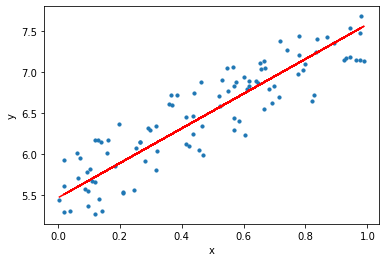

In [70]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)


lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)  # 평균 제곱 오차를 구하는 함수

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    # 경사하강법으로 매개 변수를 갱신합니다. 
    # 매개변수를 갱신할 때 인스턴스 변수의 data에 대해 계산합니다. 
    # 매개변수의 갱신은 단순히 데이터를 갱신할 뿐이므로 계산 그래프를 만들 필요는 없습니다. 
    # Update .data attribute (No need grads when updating params)
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)


# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

- 코드를 실행해 보면 손실 함수의 출력값이 줄어드는 것을 확인할 수 있습니다. 
- W, b, loss값은 각각 variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756) 입니다. 
- 이 매개변수에 의해 얻어지는 직선 그래프는 아래와 같습니다. 

![title](image/그림42-5.png)

- 위와 같이 데이터에 적합(fit)된 모델을 얻을 수 있습니다. 
- DeZero를 사용하여 선형 회귀를 성공적으로 구현했습니다!

## 42.4 [보충] DeZero의 mean_sqaured_error 함수

- 방금 우리는 평균 제곱 오차를 구하는 함수를 구현했습니다. 

In [72]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

- 이 함수는 계산을 정확하게 수행합니다. 
- 그리고 DeZero 함수를 사용하여 계산하므로 미분도 할 수 있습니다. 
- 그러나 구현 방식에는 개선할 점이 있습니다. 
- 아래 계산 그래프를 살펴봅시다. 

![title](image/그림42-6.png)

- 위는 mean_sqaured_error 함수가 만들어내는 계산 그래프입니다. 
- 주목할 점은 중간에 등장하는 이름 없는 변수 세개입니다. 
- 이 변수들은 계산 그래프에 기록되어 있기 때문에 계산 그래프가 존재하는 동안은 메모리에 계속 살아 있습니다. 
- 이 변수들의 데이터(ndarray 인스턴스)도 마찬가지로 계속 살아 있습니다. 
    - DeZero에서 미분을 하려면 먼저 순전파를 한 다음에 역전파를 진행합니다. 위의 변수들(과 그 변수들이 참조하는 데이터들)은 순전파와 역전파 내내 메모리를 차지하게 됩니다. 
- 컴퓨터 메모리를 절약하기 위해 더 나은 방식으로 구현해 보겠습니다. 
    - 바로 Function 클래스를 상속하여 구현하는 방식입니다. 

In [73]:
class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff ** 2).sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2. / len(diff))
        gx1 = -gx0
        return gx0, gx1


def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0, x1)

- 우선 순전파는 ndarray 인스턴스로 구현합니다. 
- 역전파 구현은 먼저 수식으로 미분을 계산한 다음 해당 수식을 코드로 옮기면 됩니다. 

- 새로 구현한 mean_squared_error 함수는 같은 결과를 얻지만 메모리는 덜 사용합니다. 
- 아래와 같은 계산 그래프가 만들어지기 때문입니다. 

![title](image/그림42-7.png)

- 중간에 등장했던 변수들이 사라졌음을 알 수 있습니다. 
- 중간 데이터들은 MeanSquaredError 클래스의 forward 메서드에서만 사용됩니다. 
- 더 정확하게 말하면, 이 변수들은 ndarray 인스턴스로 사용되며 forward 메서드의 범위를 벗어나는 순간 메모리에서 삭제됩니다. 
- dezero/functions.py에 위 방식으로 mean_squared_error 함수를 구현했습니다. (이전 함수는 mean_squared_error_simple로 남겨둡니다.)